In [ ]:
import keras
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from PIL import Image
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


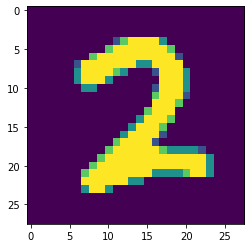

In [ ]:
import matplotlib.pyplot as plt  
#plt.imshow(x_train[2])
plt.imshow(x_test[-5])



In [ ]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')
x_test = x_test.reshape(10000,28,28,1).astype('float32')


In [ ]:
number_of_classes = 10

y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#build model
model = Sequential()
model.add( Conv2D(64,(3,3), input_shape=(28,28,1), activation="relu"))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(Flatten())
model.add( Dense(number_of_classes,activation="softmax"))

In [ ]:
#compile model
# model.compile(
#               loss = tensorflow.keras.losses.sparse_categorical_crossentropy(from_logits=True),
#               optimizer="adam",
#               metrics=['accuracy'])
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
#fixing the model
model.fit(x_train,
          y_train,
          validation_data = (x_test,y_test),
          epochs=50,
          batch_size=32)

Epoch 1/50
1875/1875 [==============================] - 16s 4ms/step - loss: 0.2131 - accuracy: 0.9526 - val_loss: 0.0765 - val_accuracy: 0.9750
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0611 - accuracy: 0.9815 - val_loss: 0.0716 - val_accuracy: 0.9789
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0678 - val_accuracy: 0.9816
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0923 - val_accuracy: 0.9760
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0239 - accuracy: 0.9929 - val_loss: 0.0944 - val_accuracy: 0.9796
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.1076 - val_accuracy: 0.9797
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.1051 - val_accuracy

# New Section

# New Section

In [ ]:
metrix = model.evaluate(x_test,y_test,verbose=0)
print("Test loss and accuracy")
print(metrix)


Test loss and accuracy
[1.136513113975525, 0.9818000197410583]


In [ ]:
model.save('models/mnistCNN.h5')